In [136]:
import sim
import time
import cv2
import numpy as np
from PIL import Image
from queue import PriorityQueue
import math
from numpy import sqrt
import itertools

In [170]:
def resize(img,resolution):
    scale_percent = 500 # percent of original size
    width = int(resolution[1] * scale_percent / 100)
    height = int(resolution[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized
def x_w_i(w_x):
    y=((w_x+2.5)*1280)/5
    return round(y)
def y_w_i(w_y):
    x=((2.5-w_y)*1280)/5
    return round(x)
def x_i_w(i_x):
    y=(i_x*5/1280)-2.5
    return y
def y_i_w(i_y):
    x=(2.5)-(i_y*5/1280)
    return x
def draw_rec_red(x,image):
    for i in range(120):
         for j in range(120):
                if (0<x[0]-60+i<1280 and 0<x[1]-60+j<1280):
                    image[x[0]-60+i][x[1]-60+j]=(255,0,0)
                    
                    
def draw_rec_red_c(x,y,image):
    for i in range(10):
         for j in range(10):
                if (0<x-5+i<1280 and 0<y-5+j<1280):
                    image[x-5+i][y-5+j]=(255,0,0)
                    
                    
def draw_rec_green_c(x,y,image):
    for i in range(10):
         for j in range(10):
                if (0<x-5+i<1280 and 0<y-5+j<1280):
                    image[x-5+i][y-5+j]=(0,255,0)

def draw_rec_blue_c(x,y,image):
    for i in range(10):
         for j in range(10):
                if (0<x-5+i<1280 and 0<y-5+j<1280):
                    image[x-5+i][y-5+j]=(0,0,255)

def draw_rec_blue(x,image): 
    for i in range(120):
         for j in range(120):
                if (0<x[0]-60+i<1280 and 0<x[1]-60+j<1280):
                    image[x[0]-60+i][x[1]-60+j]=(0,0,255)
                    
                    
def draw_rec_green(x,image):
    for i in range(120):
         for j in range(120):
                if (0<x[0]-60+i<1280 and 0<x[1]-60+j<1280):
                    image[x[0]-60+i][x[1]-60+j]=(0,255,0)
                    
def draw_rec_black(a,b,img):
    for i in range(256):
         for j in range(256):
                if (0<a-128+i<1280 and 0<b-128+j<1280):
                    img[a-128+i][b-128+j]=0
def draw_rec_black_c(a,b,img):
    for i in range(128):
         for j in range(128):
                if (0<a-64+i<1280 and 0<b-64+j<1280):
                    img[a-64+i][b-64+j]=0
                    
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

def obstacles_grid(img):
    # getting the walls 
    mask_wall = cv2.inRange(img, np.array([228,228,253]),np.array([230,230,2256]))
    # getting the rims
    mask_rim = cv2.inRange(img, 0, 0)
    mask_total = cv2.bitwise_or(mask_wall,mask_rim,mask_rim)
    mask_total = cv2.bitwise_not(mask_total)
    return mask_total


def dist(x,y):
    dist = sqrt( (x[0] - y[0])**2 + (x[1] - y[1])**2 )
    return round(dist)



def get(array):
    array.sort()
    return array.pop(0)
    

def put(array,data):
    array.append(data)
    array.sort()
    return array

def expand(s):
    aa=[]
    for row in s:
        for a_a in row[1:]:
            aa.append(a_a)
    return aa
def man_dis(x,y):
    x1,y1=x
    x2,y2=y
    return abs(x1-x2)+abs(y1-y2)

def conv(s):
    g=round((s/128)-0.5)
    return g
def incov(s):
    g=(s+0.5)*128
    return g


     

In [138]:
sim.simxFinish(-1)
scale_percent =600
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)
thistime = time.time()
if clientID != -1:
    res_ro, robot = sim.simxGetObjectHandle(clientID, 'Pioneer_p3dx', sim.simx_opmode_oneshot_wait)
    res_l,right_motor_handle = sim.simxGetObjectHandle(clientID,'Pioneer_p3dx_rightMotor',sim.simx_opmode_oneshot_wait)
    res_r,left_motor_handle = sim.simxGetObjectHandle(clientID,'Pioneer_p3dx_leftMotor',sim.simx_opmode_oneshot_wait)
    res_floor,floor=sim.simxGetObjectHandle(clientID,'ResizableFloor_5_25',sim.simx_opmode_blocking)
    res,camera = sim.simxGetObjectHandle(clientID, 'ss', sim.simx_opmode_oneshot_wait)
    err, resolution, image = sim.simxGetVisionSensorImage(clientID, camera, 0, sim.simx_opmode_streaming)
    while (sim.simxGetConnectionId(clientID) != -1):
        res_pos,pos=sim.simxGetObjectPosition(clientID,robot,-1,sim.simx_opmode_oneshot_wait)
        res_or,orien=sim.simxGetObjectOrientation(clientID,robot,-1,sim.simx_opmode_oneshot_wait)
        print(pos)
        #print(orien)
        err, resolution, image = sim.simxGetVisionSensorImage(clientID, camera, 0, sim.simx_opmode_buffer)
        if err == sim.simx_return_ok:
            img = np.array(image, dtype=np.uint8)
            img.resize([resolution[0], resolution[1], 3]) 
            resized=resize(img,resolution)
            image = Image.fromarray(resized, 'RGB')
        sim.simxFinish(clientID)
img_obs = obstacles_grid(resized)
img_obsc=img_obs.copy()
xs=x_w_i(pos[0])
ys=y_w_i(pos[1])
start=[0,[xs,ys]]
goal=[x_w_i(-2.25),y_w_i(2.25)]


[2.2485477924346924, -2.250379800796509, 0.1386469304561615]


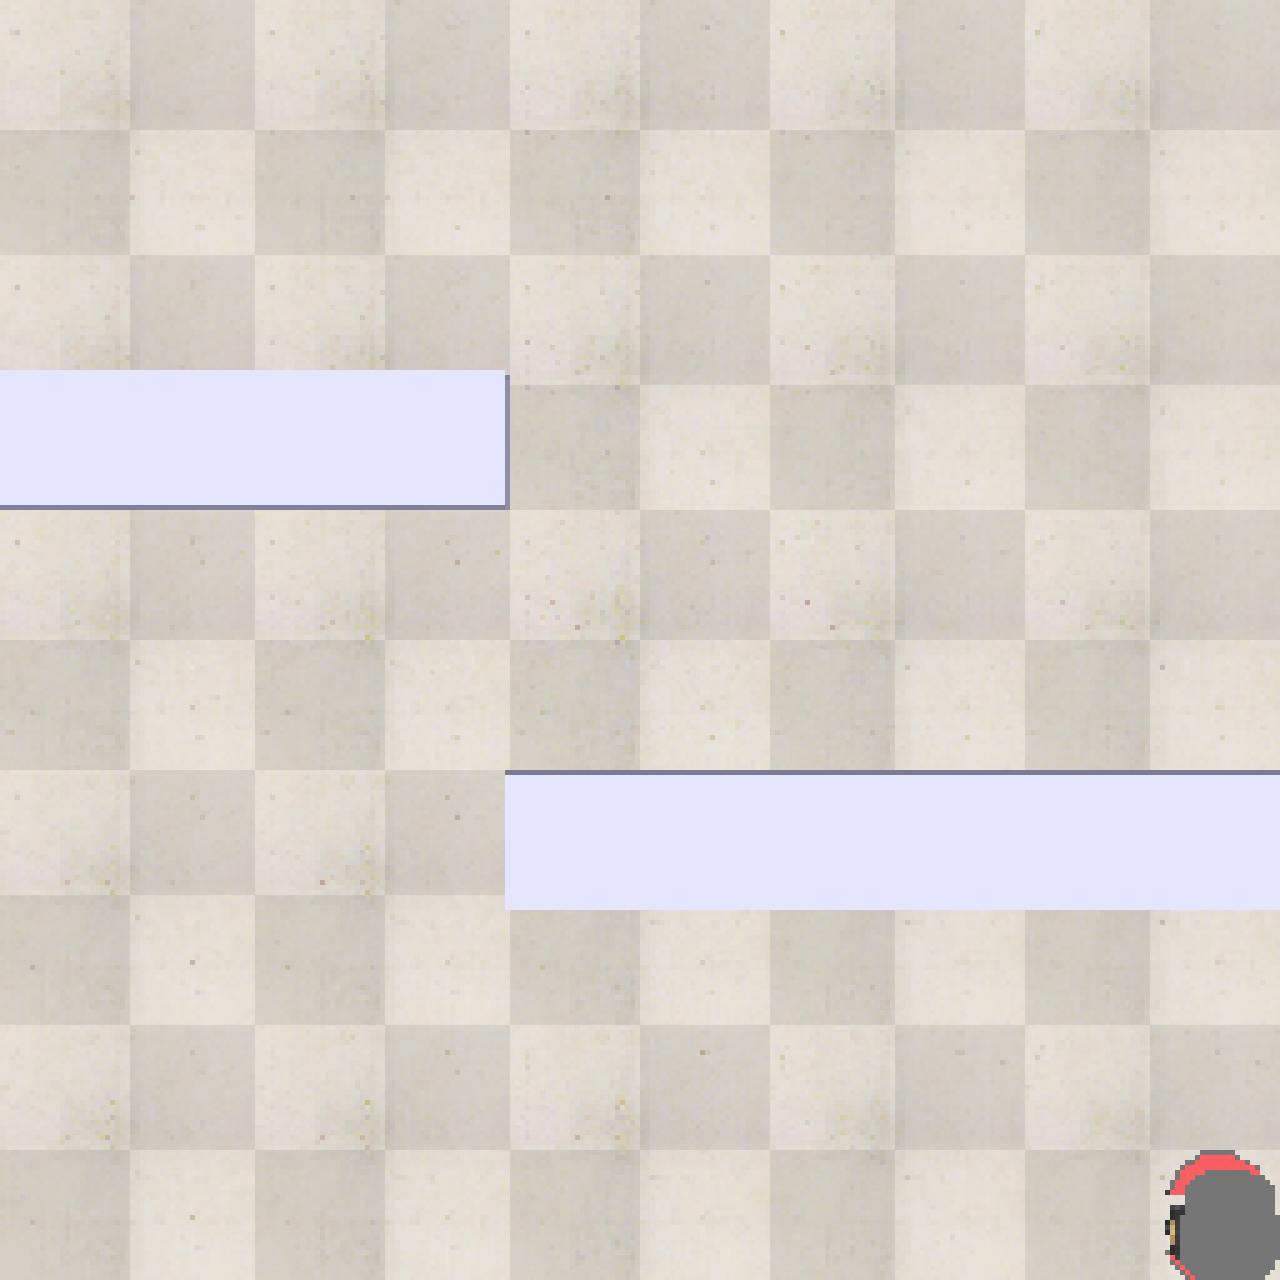

In [139]:
image_pp = Image.fromarray(resized)
image_pp


In [140]:
#set a configuration space
for i in range(64,1280,128):
    for j in range(64,1280,128):
        if img_obs[i][j]==0:
            draw_rec_black(i,j,img_obsc)

for i in range(20,1280,20):
    for j in range(20,1280,20):
        if (i==20 or i==1260 or j==20 or j==1260):
            draw_rec_black_c(i,j,img_obsc)

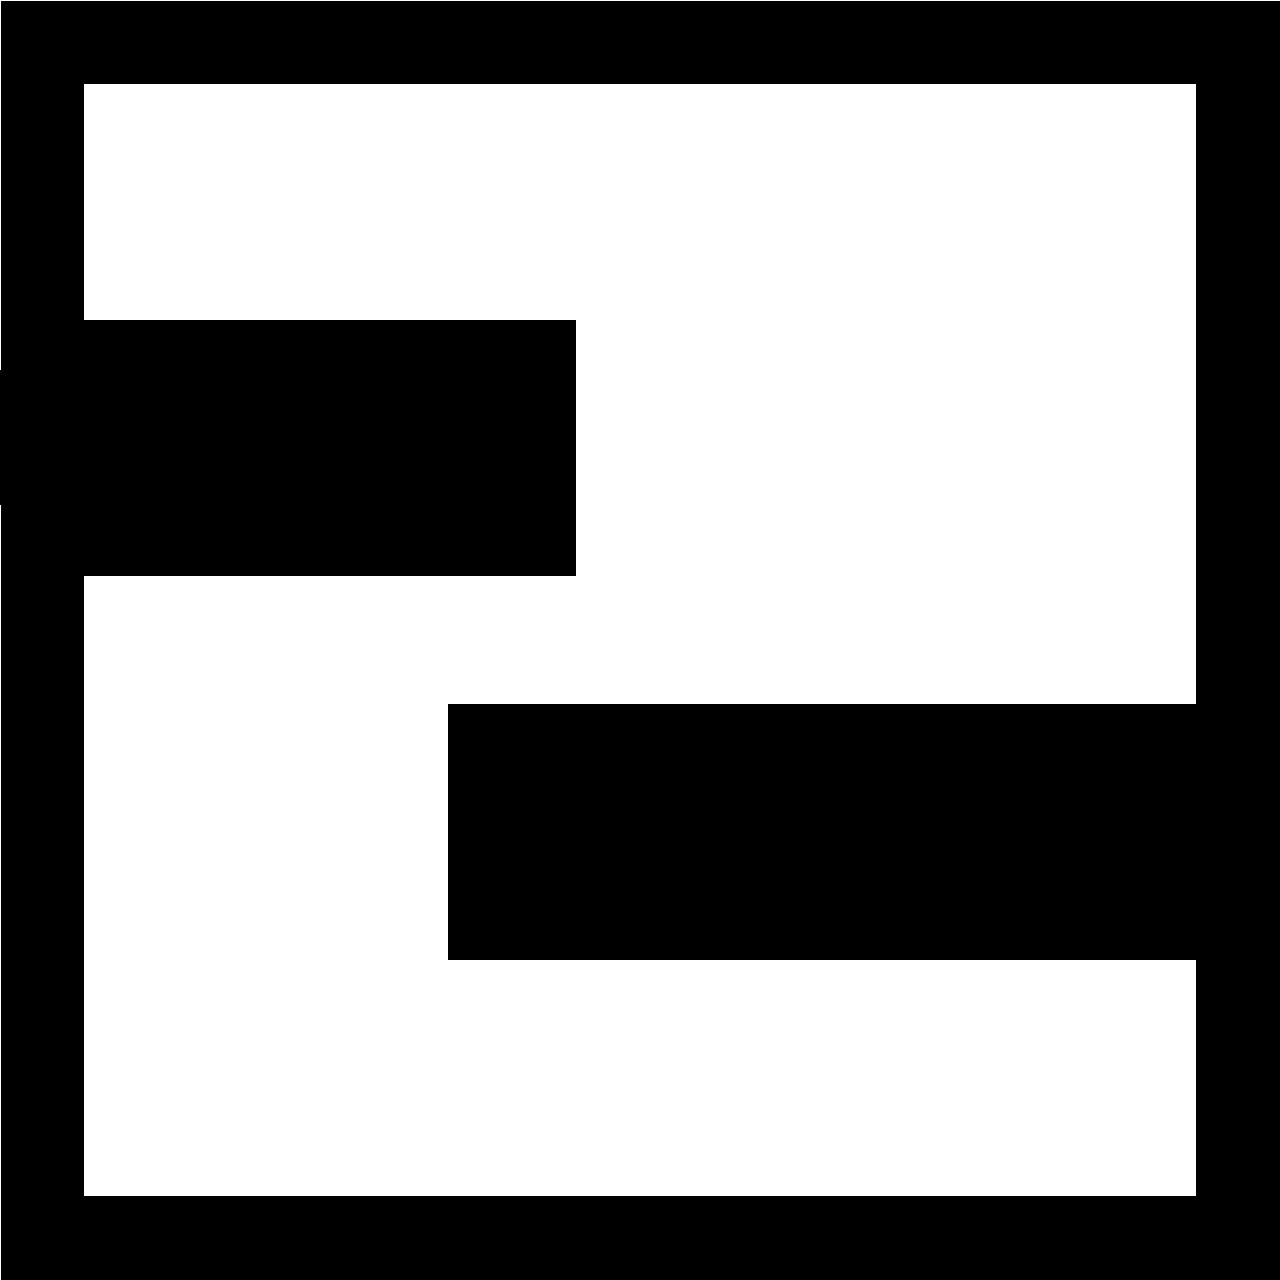

In [141]:
image_ob = Image.fromarray(img_obsc)
image_ob

In [142]:
points=[]
for i in range(64,1280,128):
    for j in range(64,1280,128):
        aa=[(i+ int(np.random.normal(0,20))),(j+ int(np.random.normal(0,20)))]
        if img_obsc[aa[0]][aa[1]]!=0:
            points.append(aa)
            draw_rec_red_c(aa[0],aa[1],resized)

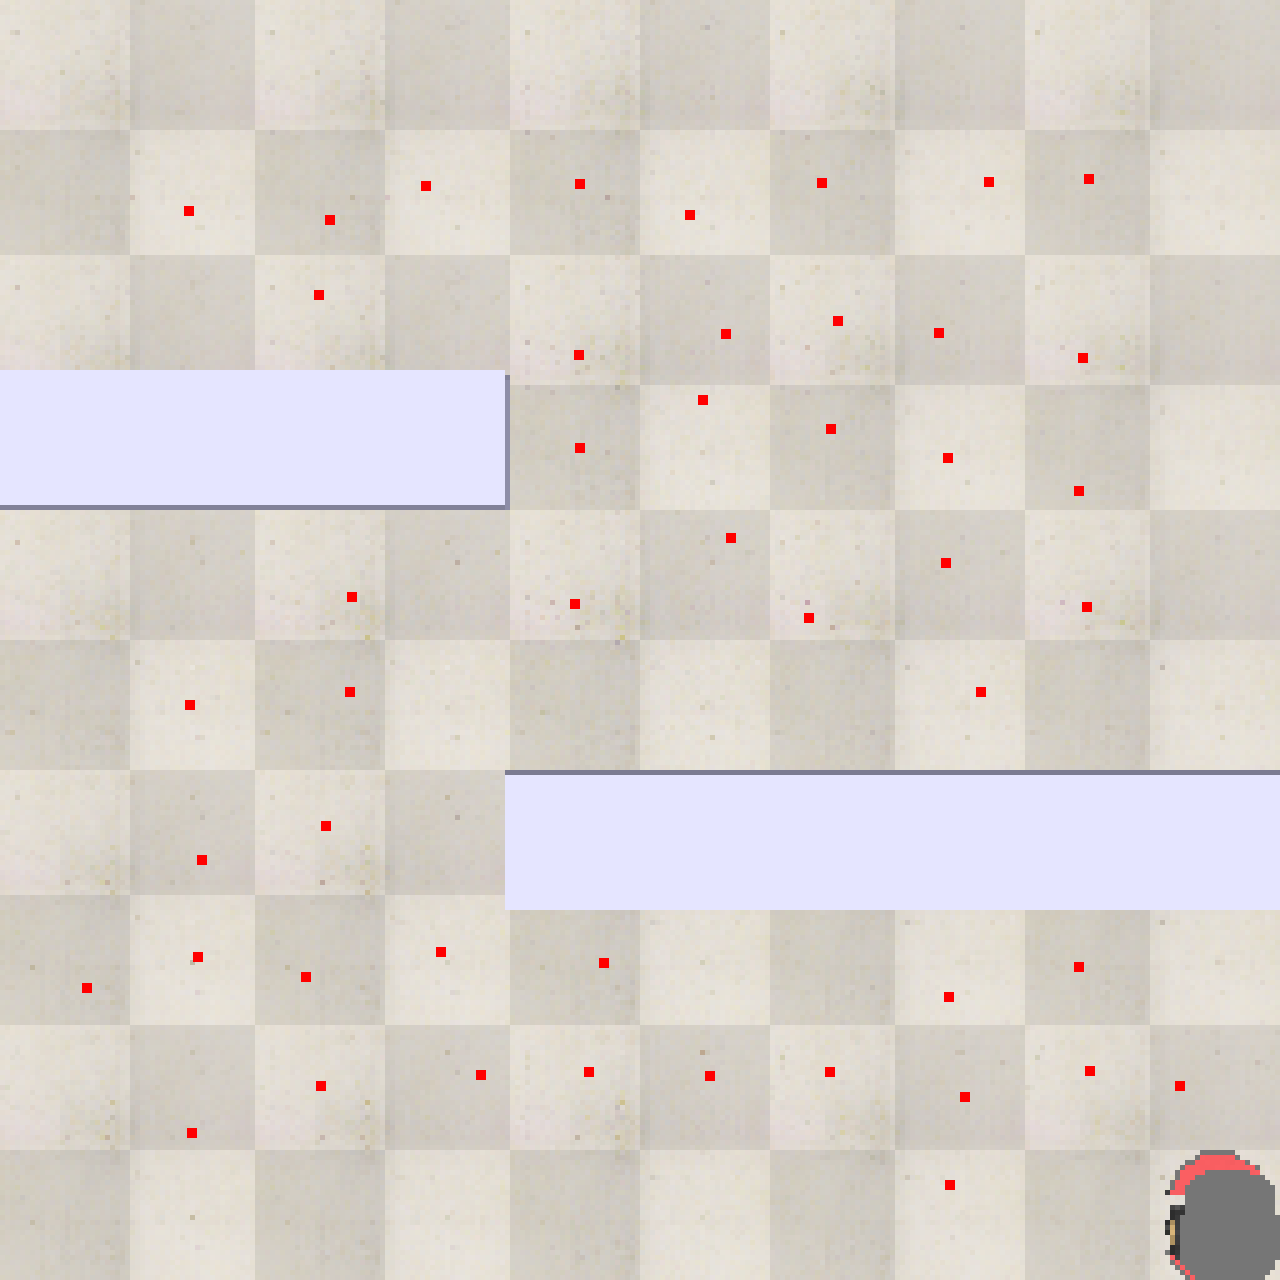

In [143]:
image_pp = Image.fromarray(resized)
image_pp

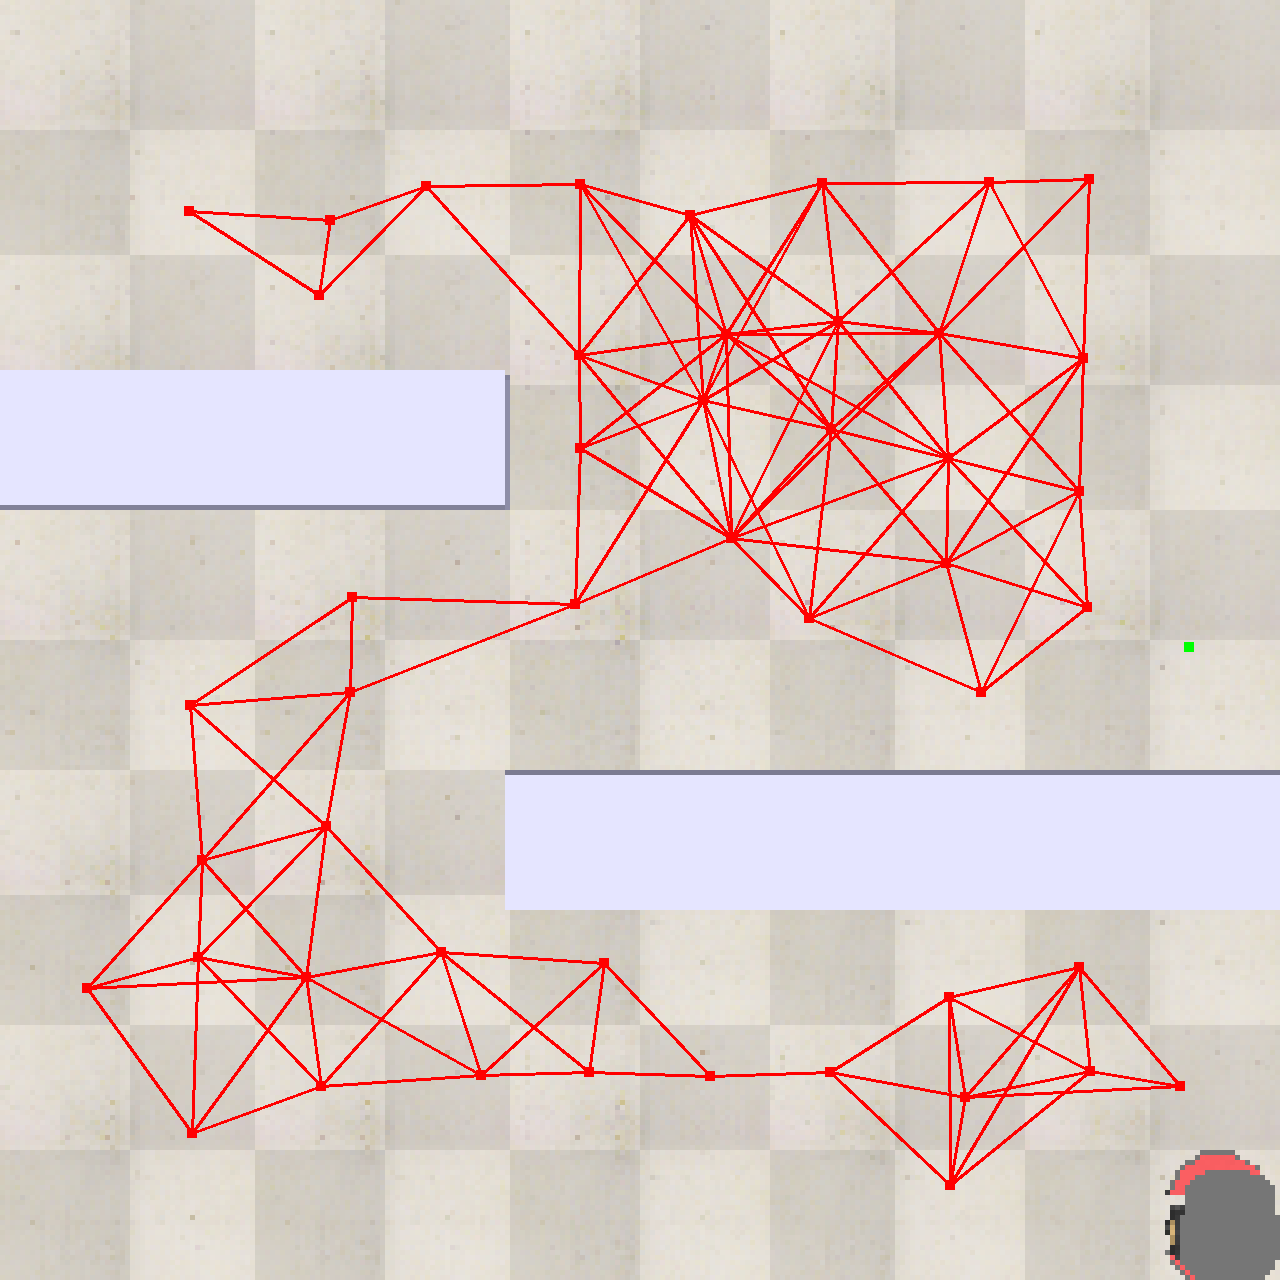

In [152]:
for i in range(len(points)):
    for j in range(len(points)):
        for a in range(450):
            for b in range(450):
                if (points[i][0]-225+a == points[j][0] and points[i][1]-225+b == points[j][1]):
                    cv2.line(resized, (points[i][1],points[i][0]),(points[j][1],points[j][0]), [ 255,0, 0], 2) 
image_pp = Image.fromarray(resized)
image_pp

In [153]:
def neighbours(x,points):
    neigh=[]
    for i in range(len(points)):
        for a in range(450):
            for b in range(450):
                if (x[0]-225+a == points[i][0] and x[1]-225+b == points[i][1]):
                    neigh.append([x[0]-225+a,x[1]-225+b])
    return neigh

In [154]:
closed=[]
def ucs(start,goal,resized,img_obsc,points):
    open_l=[]
    open_l.append(start)
    while open_l:
        open_l.sort()
        node=get(open_l)
        print(node)
        node1=node[-1]
        print(node1)
        distance=node[0]
        closed.append(node1)
        if(goal[0]-200<node1[0]<goal[0]+200 and goal[1]-200<node1[1]<goal[1]+200):
            return node
            break
        else:
            nei=neighbours(node1,points)
            open_le=expand(open_l)
            for ne in nei:
                if ne not in open_le and ne not in closed:
                    a=node.copy()
                    a[0]=dist(node1,ne)+distance+man_dis(goal,ne)
                    a.append(ne)
                    open_l.append(a)
                else:
                    for ro in open_l:
                        if ro[-1]==ne:
                            if ro[0]>(dist(node1,ne)+distance+man_dis(goal,ne)):
                                open_l.remove(ro)
                                a=node.copy()
                                a[0]=dist(node1,ne)+distance+man_dis(goal,ne)
                                a.append(ne)
                                open_l.append(a)
            
            
            
cc= ucs(start,goal,resized,img_obsc,points)

[0, [1216, 1216]]
[1216, 1216]
[2225.0, [1216, 1216], [1071, 1090]]
[1071, 1090]
[2273.0, [1216, 1216], [1086, 1180]]
[1086, 1180]
[4202.0, [1216, 1216], [1071, 1090], [997, 949]]
[997, 949]
[4248.0, [1216, 1216], [1071, 1090], [967, 1079]]
[967, 1079]
[4287.0, [1216, 1216], [1071, 1090], [1097, 965]]
[1097, 965]
[4413.0, [1216, 1216], [1071, 1090], [1185, 950]]
[1185, 950]
[6117.0, [1216, 1216], [1071, 1090], [997, 949], [1072, 830]]
[1072, 830]
[7895.0, [1216, 1216], [1071, 1090], [997, 949], [1072, 830], [1076, 710]]
[1076, 710]
[9489.0, [1216, 1216], [1071, 1090], [997, 949], [1072, 830], [1076, 710], [963, 604]]
[963, 604]
[9549.0, [1216, 1216], [1071, 1090], [997, 949], [1072, 830], [1076, 710], [1072, 589]]
[1072, 589]
[10917.0, [1216, 1216], [1071, 1090], [997, 949], [1072, 830], [1076, 710], [963, 604], [952, 441]]
[952, 441]
[11083.0, [1216, 1216], [1071, 1090], [997, 949], [1072, 830], [1076, 710], [963, 604], [1075, 481]]
[1075, 481]
[12112.0, [1216, 1216], [1071, 1090], [9

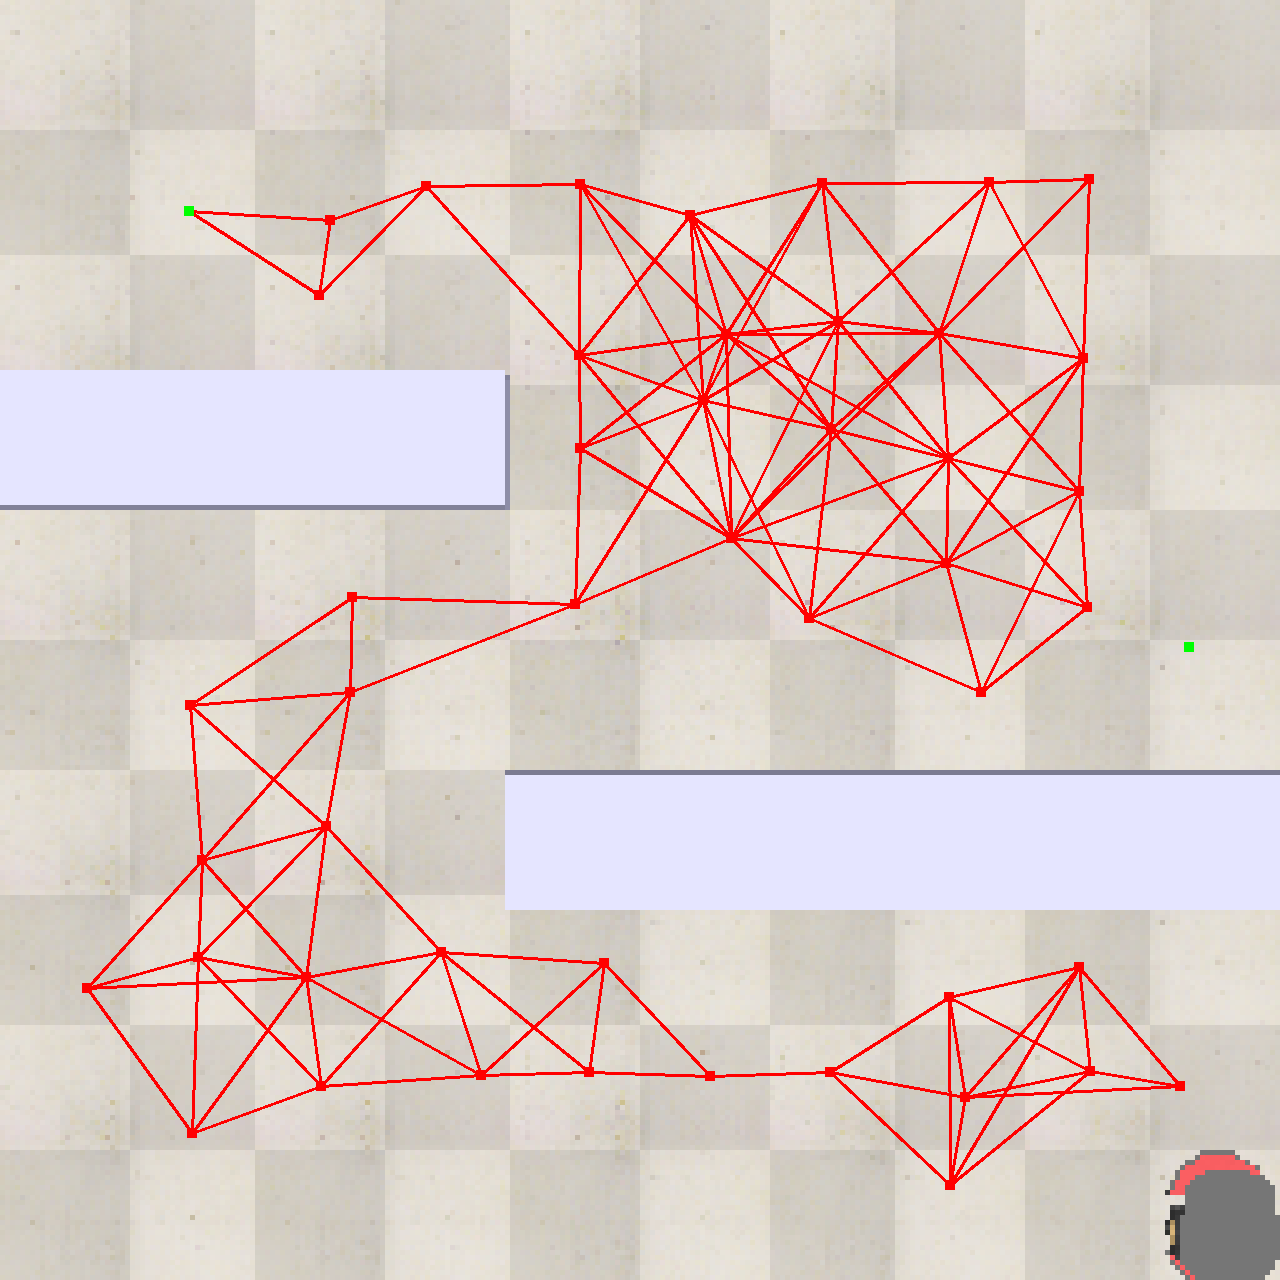

In [156]:
image_pp = Image.fromarray(resized)
image_pp

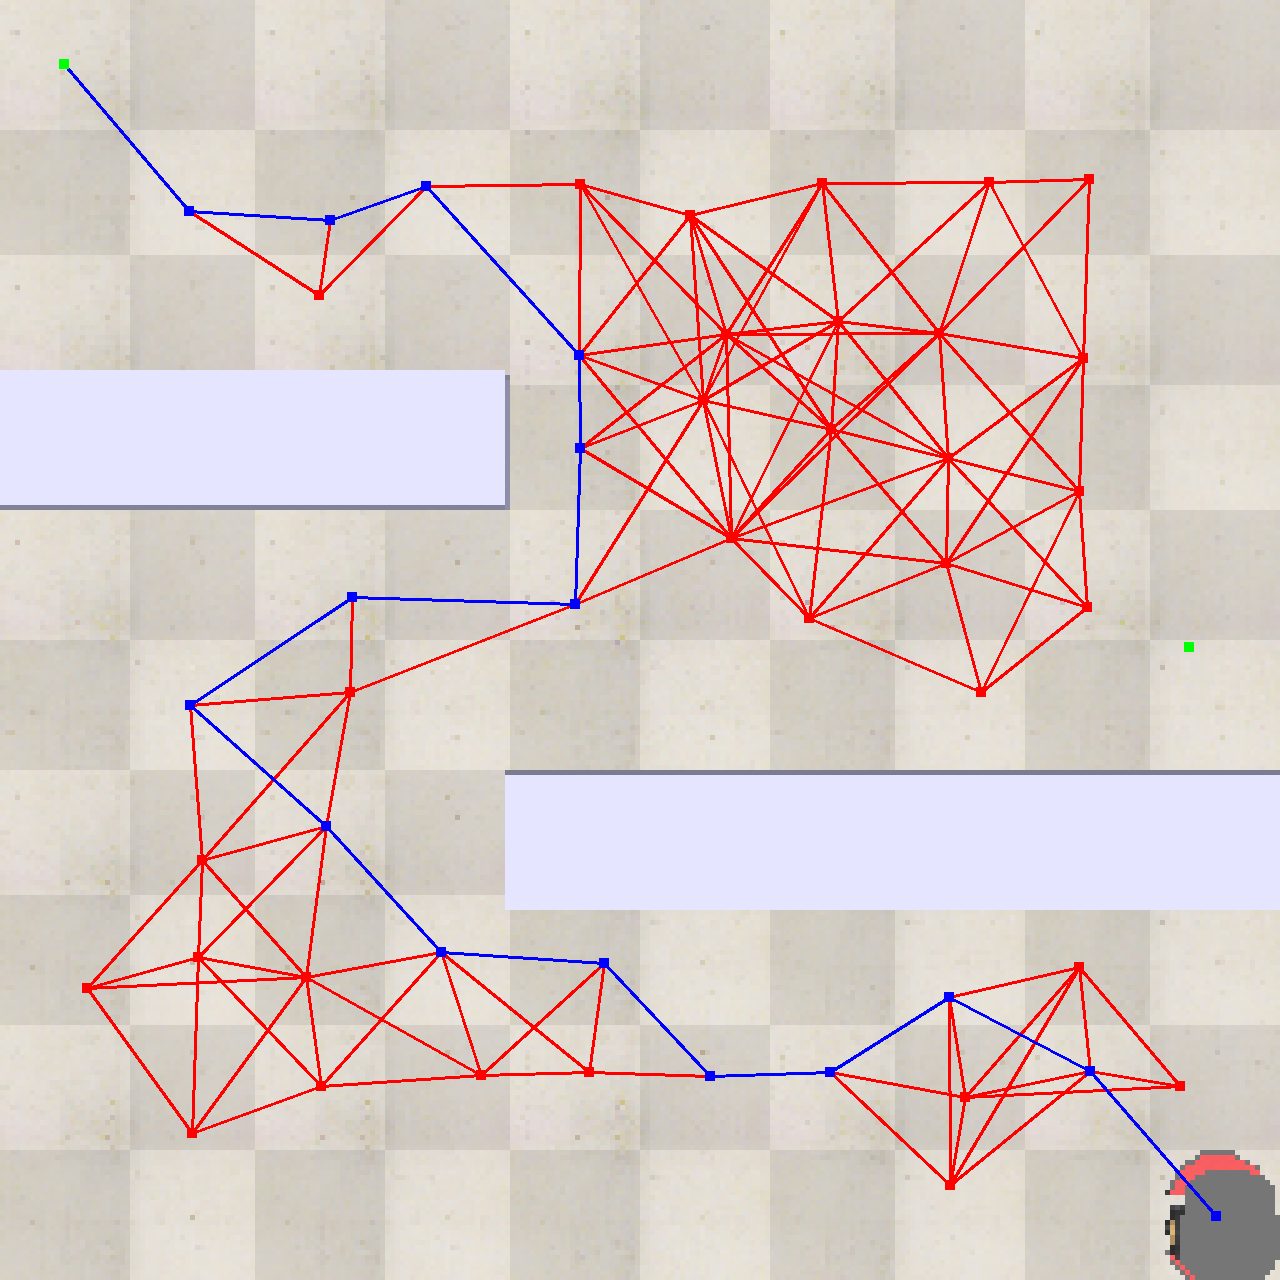

In [173]:
route=cc[1:]
for i in range(len(route)):
    if i+1<16:
        draw_rec_blue_c(route[i][0],route[i][1],resized)
        draw_rec_blue_c(route[i+1][0],route[i+1][1],resized)
        cv2.line(resized, (route[i][1],route[i][0]),(route[i+1][1],route[i+1][0]), [0,0, 255], 2)

cv2.line(resized, (route[-1][1],route[-1][0]),(goal[1],goal[0]), [0,0, 255], 2)   
draw_rec_green_c(goal[0],goal[1],resized)
image_pp = Image.fromarray(resized)
image_pp  
    